<a href="https://colab.research.google.com/github/TaranSchlich/Scooter-Rental-Analysis-UW-Madison-MSDIA/blob/main/GB881_Final_Project_Schlichtmann_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scooter Rental Analysis

By Taran Schlichtmann

### Importing Libraries for Analysis of Data

In [ ]:
# Importing libraries for data manipulation and visualization

import pandas as pd               # data handling and manipulation
import seaborn as sns             # statistical data visualization
import matplotlib.pyplot as plt   # plotting graphs and charts
from scipy import stats           # statistical functions
from sklearn.linear_model import LinearRegression       # linear regression modeling
from sklearn.model_selection import train_test_split    # splitting data into training/test sets
from sklearn import metrics       # model evaluation metrics

Loading all necessary Python libraries for data manipulation, visualization, statistical analysis, and machine learning. These tools will be used throughout the notebook to explore and model the scooter rental dataset.

### Loading Dataset into Dataframe

In [ ]:
# Uploading the CSV file into a dataframe with Pandas

URL_Scooter_Rentals = 'https://bit.ly/scooter-rentals'

Dataframe_Scooter_Rentals = pd.read_csv(URL_Scooter_Rentals)

Scooter rental dataset is imported directly from a URL into a pandas DataFrame. This allows for efficient data handling and analysis.

### Dimensions of Dataset

In [ ]:
# Determining the number of rows and columns of dataset to get an idea size

Dataframe_Scooter_Rentals.shape

(731, 14)

Checking the shape of dataset to understand how many records (rows) and features (columns) are available for analysis. Dataset provided contains 731 rows and 14 columns.

### Columns and Datatypes

In [ ]:
# Viewing the columns and datatypes

Dataframe_Scooter_Rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            731 non-null    int64  
 1   date          731 non-null    object 
 2   yr            731 non-null    int64  
 3   mnth          731 non-null    int64  
 4   weekday       731 non-null    int64  
 5   workday       731 non-null    int64  
 6   season        731 non-null    int64  
 7   holiday       731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  wind          731 non-null    float64
 12  unregistered  731 non-null    int64  
 13  registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


Providing a summary of all columns, including their names, data types, and whether any missing values exist. Helps to understand the structure of dataset. Each column contains 731 records of non-null values. Datatypes in dataset are int64, object, and float64.

### Column Name Adjsutment

In [ ]:
# Adjusting the field names for ease of readability and understanding
# Using a dictionary to rename multiple fields in a single step, then overwrite the original dataframe

Dataframe_Scooter_Rentals = Dataframe_Scooter_Rentals.rename(columns={'yr' : 'year',
                                                                      'mnth' : 'month',
                                                                      'hum' : 'humidity_norm',
                                                                      'temp' : 'temp_norm',
                                                                      'atemp' : 'temp_felt_norm',
                                                                      'wind' : 'wind_norm',
                                                                      'registered' : 'rentals_registered',
                                                                      'unregistered' : 'rentals_unregistered'})

# Relisting columns to confirm changes were made as intended

Dataframe_Scooter_Rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    731 non-null    int64  
 1   date                  731 non-null    object 
 2   year                  731 non-null    int64  
 3   month                 731 non-null    int64  
 4   weekday               731 non-null    int64  
 5   workday               731 non-null    int64  
 6   season                731 non-null    int64  
 7   holiday               731 non-null    int64  
 8   temp_norm             731 non-null    float64
 9   temp_felt_norm        731 non-null    float64
 10  humidity_norm         731 non-null    float64
 11  wind_norm             731 non-null    float64
 12  rentals_unregistered  731 non-null    int64  
 13  rentals_registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


To improve readability and maintain consistency, renaming several columns using more descriptive names. This makes future analysis and visualization easier to interpret.

### Dataset Field Description Reference

In [ ]:
# Referencing datasets field descriptions used throughout data

field_descriptions_url = "https://courses.edx.org/asset-v1:WisconsinX+WSB0007+3T2023+type@asset+block@Statistics_Using_Python_-_Final_Project_-_Field_Descriptions.pdf"

### Dataset Record Preview

In [ ]:
# Previewing the first 5 records in dataset to get a feel for what data looks like

Dataframe_Scooter_Rentals.head(5)

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


Displaying the first few rows of dataset to get a sense of data values and confirm that the column renaming was successful.

### Data Replacement

In [ ]:
# Replacing numbers 1, 2, 3, 4 in the 'season' field with season names

Dataframe_Scooter_Rentals['season'] = Dataframe_Scooter_Rentals['season'].replace([1, 2, 3, 4], ['winter',
                                                                                                         'spring',
                                                                                                         'summer',
                                                                                                         'fall'])

Dataframe_Scooter_Rentals.head(5)

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518


The 'season' column originally uses numeric codes. Replacing these with actual season names to make visualizations and analysis more intuitive.

### Column Creation

In [ ]:
# Creating a new column of 'rentals_total' that sums registered and unregistered rentals

Dataframe_Scooter_Rentals['rentals_total'] = Dataframe_Scooter_Rentals['rentals_registered'] + Dataframe_Scooter_Rentals['rentals_unregistered']

# Previewing records to ensure changes were made properly

Dataframe_Scooter_Rentals.head(5)

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


A new column is created to represent the total number of scooter rentals by summing registered and unregistered rentals. This will be a key variable for this analysis.

### Descriptive Statistics

In [ ]:
# Viewing the descriptive statistics for the numeric columns in dataset

Dataframe_Scooter_Rentals.describe()

,ID,year,month,weekday,workday,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,0.683995,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,0.465233,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,1.000000,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,1.000000,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Generating summary statistics for all numeric columns to understand the distribution, central tendency, and variability of data.

### Identifying Missing Values

In [ ]:
# Determining if there are any missing values and dropping rows that contain any

Dataframe_Scooter_Rentals.isnull().sum()

,0
ID,0
date,0
year,0
month,0
weekday,0
workday,0
season,0
holiday,0
temp_norm,0
temp_felt_norm,0


Verifying whether any columns contain missing values. This ensures data integrity before proceeding with visualizations and modeling.

### Histogram

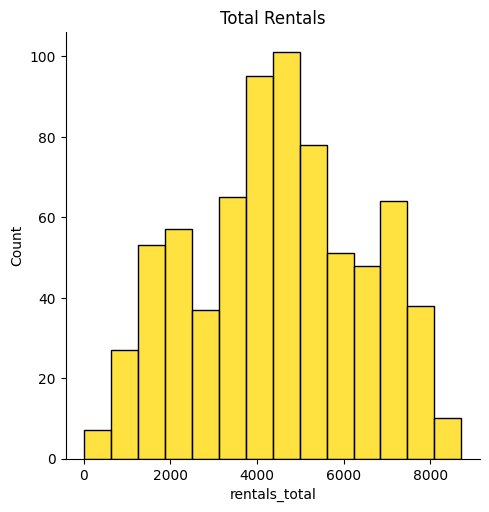

In [ ]:
# Generating a histogram to visualize the distribution of 'rentals_total' column

sns.displot(data=Dataframe_Scooter_Rentals, x='rentals_total', color = 'Gold').set(title = 'Total Rentals')

This histogram visualizes the distribution of total daily scooter rentals across dataset. The x-axis represents the number of rentals per day, ranging from 0 to 9000, while the y-axis shows the frequency of those rental counts. Most rental days fall within the 4000–5000 range, which also has the highest frequency at just over 100 occurrences. The shape of the distribution suggests a central tendency around mid-range rental volumes, with fewer days showing extremely low or high totals. This visualization helps identify typical rental activity and potential outliers, providing a foundation for further analysis and modeling.

### Scatterplot

[Text(0.5, 1.0, 'Scatterplot of Unregistered vs Registered Rentals')]

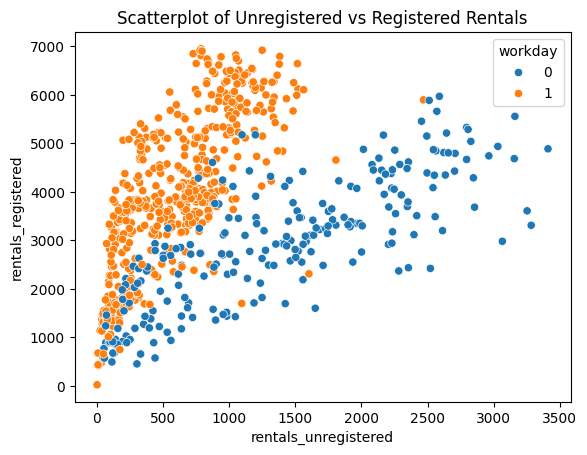

In [ ]:
# Generating a scatterplot that has 'rentals_unregistered' on the x-axis and 'rentals_registered' on the y-axis
# As a note, when 'workday' is 0, it is a weekend – Saturday or Sunday
# Coloring datapoints whether it was a workday or not

sns.scatterplot(data=Dataframe_Scooter_Rentals, x='rentals_unregistered', y='rentals_registered', hue='workday').set(title = 'Scatterplot of Unregistered vs Registered Rentals')

This scatterplot illustrates the relationship between unregistered and registered scooter rentals, with each data point color-coded by workday status. The x-axis represents unregistered rentals, while the y-axis shows registered rentals. Orange points indicate workdays (workday = 1), and blue points represent non-workdays (workday = 0).

The plot reveals a positive correlation and days with more unregistered rentals tend to also have more registered rentals. However, the distribution varies significantly by workday status. Workdays show a denser cluster of higher rental counts, suggesting increased commuter or routine usage. In contrast, non-workdays exhibit a more dispersed pattern with generally lower rental volumes. This visualization helps distinguish behavioral patterns between weekday and weekend riders and supports further segmentation in modeling.

### Swarmplot

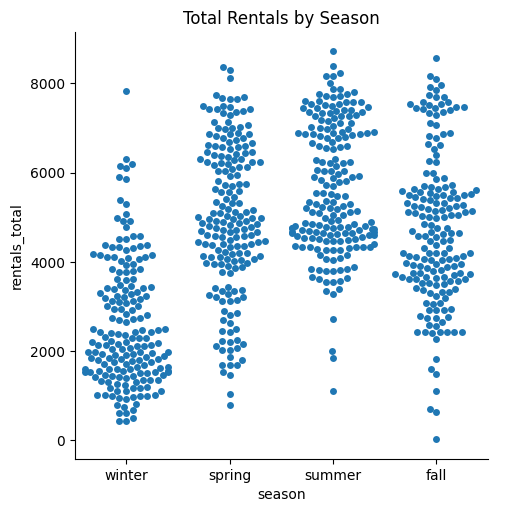

In [ ]:
# Exploring total rentals by reason
# 'season' on the x-axis and 'rentals_total' on the y-axis

sns.catplot(data=Dataframe_Scooter_Rentals, x='season', y='rentals_total', kind='swarm').set(title = 'Total Rentals by Season')

This swarmplot displays the distribution of total scooter rentals across the four seasons: winter, spring, summer, and fall. Each vertical cluster of points represents individual rental totals for days within that season. The y-axis quantifies the total number of rentals, while the x-axis categorizes them by season.

### Line Plot

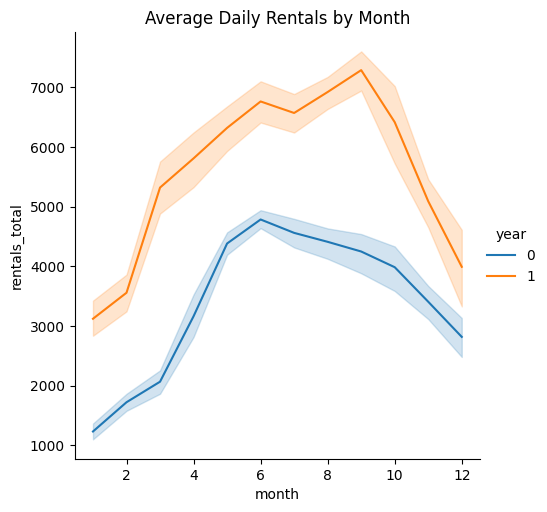

In [ ]:
# Generating a line plot that shows average daily rentals by month and lines split by year
# 'month' is on the x-axis and 'rentals_total' is on the y-axis

sns.relplot(data=Dataframe_Scooter_Rentals, x='month', y='rentals_total', hue='year', kind='line').set(title = 'Average Daily Rentals by Month')

This line plot illustrates average daily scooter rentals across each month, with separate lines for two different years (year 0 and year 1). The x-axis represents the months from January (1) to December (12), while the y-axis shows the total number of rentals per day. Each line includes a shaded region indicating variability or confidence intervals.

### Pairplot

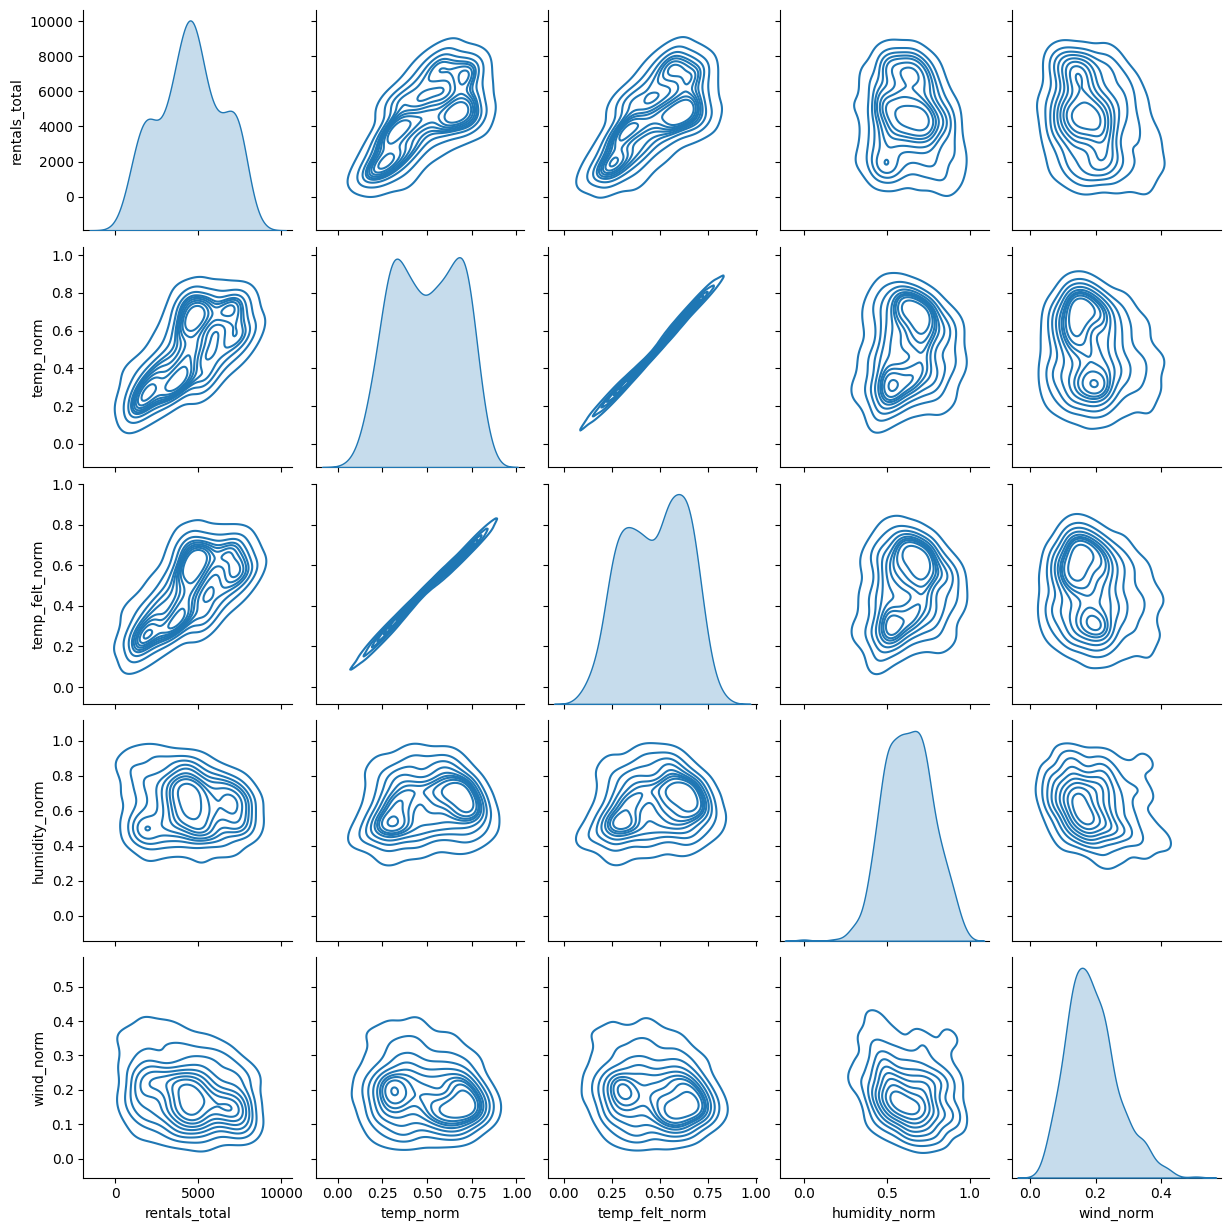

In [ ]:
# Generating a pairplot to show the relationship between 'rentals_total' and the weather indicators ('temp_norm', 'temp_felt_norm', 'humidity_norm', and 'wind_norm')

sns.pairplot(data=Dataframe_Scooter_Rentals, vars=['rentals_total', 'temp_norm', 'temp_felt_norm', 'humidity_norm', 'wind_norm'], kind='kde')

This pairplot visualizes the relationships between total scooter rentals and several weather-related variables: normalized temperature (temp_norm), perceived temperature (temp_feel_norm), humidity (humidity_norm), and wind speed (wind_norm). Each diagonal plot shows the distribution of a single variable, while the off-diagonal plots display contour plots that represent the density of data points between variable pairs. The plot reveals a strong linear relationship between temp_norm and temp_feel_norm, indicating these variables are closely correlated. A moderate positive association between temperature variables and rentals_total, suggesting warmer days tend to have more rentals. Humidity and wind show weaker or more dispersed relationships with rental volume.This visualization is useful for identifying which weather features may be most predictive of rental behavior and helps guide feature selection for modeling.

### Heatmap

<Axes: >

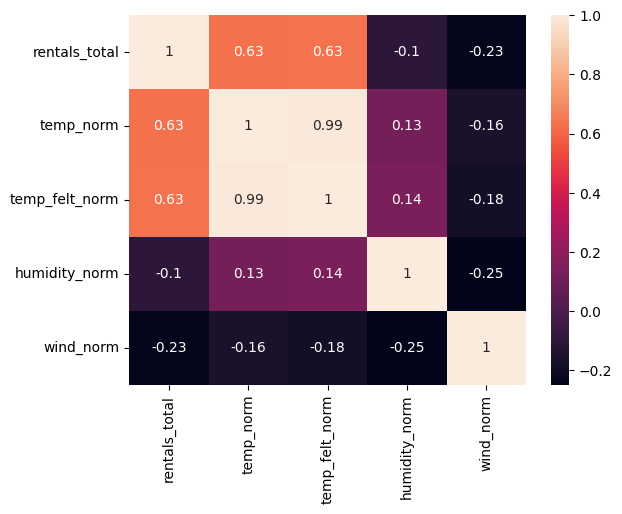

In [ ]:
# Generating a heatmap to visualize the correlation between 'rentals_total' and weather indicators ('temp_norm', 'temp_felt_norm', 'humidity_norm', and 'wind_norm')

sns.heatmap(Dataframe_Scooter_Rentals[['rentals_total', 'temp_norm', 'temp_felt_norm', 'humidity_norm', 'wind_norm']].corr(), annot=True)

The heatmap provides a visual summary of the correlation matrix between total scooter rentals and key weather-related variables: normalized temperature, perceived temperature, humidity, and wind speed. The color gradient ranges from dark purple to light orange, indicating the strength and direction of each relationship. Notably, total rentals show a strong positive correlation with both normalized and perceived temperature (0.63), suggesting that warmer days tend to drive higher rental activity. Temperature variables themselves are nearly perfectly correlated (0.99), indicating they capture similar information. In contrast, humidity and wind speed exhibit weak negative correlations with total rentals (−0.10 and −0.23, respectively), implying that higher humidity or wind may slightly suppress rental volume. This heatmap is a valuable tool for identifying which weather features are most influential and guiding feature selection for predictive modeling.

### Model Preparation

#### Separating Variables

In [ ]:
# Separating the dependent variable 'rentals_total' and the independant variable 'temp_norm'

X = Dataframe_Scooter_Rentals[['temp_norm']]
Y = Dataframe_Scooter_Rentals['rentals_total']


Building a linear regression model by selecting 'temp_norm' as the independent variable and 'rentals_total' as the dependent variable.

#### Training Set and Test Set Creation

In [ ]:
# Splitting data into training and test sets
# 25% of data in the test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

Dataset is split into training and test sets to evaluate model performance. This ensures that the model is tested.

### Model Training

In [ ]:
# Fitting the linear regression model using the training data

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Fitting a linear regression model using the training data. This model will be used to predict scooter rentals based on temperature.

### Y-Intercept and Coefficients of Regression Model

In [ ]:
# Displaying the Y-Intercept and coeffecients of regression model
# y = mx + b
# Coefficient for 'temp_norm' variable

print(model.intercept_)
print(model.coef_)

1327.930810368468
[6463.96764523]


Displaying the model’s intercept and coefficient. These values define the linear relationship between temperature and total rentals.

### Predictions with Regression Equation



In [ ]:
# Predicting 'rentals_total' when 'temp_norm' = 0.30

new_X = [[0.3]]
model.predict(new_X)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3267.12110394])

Using the regression equation, to predict the number of rentals for a specific temperature value.

### Predictions in Test Data

In [ ]:
# Using the regression model to predict total scooter rentals in the test data
# Storing predictions in variable 'y_pred'

y_pred = model.predict(X_test)

Applying the trained model to the test data to generate predictions. These will be compared to actual values to assess model accuracy.

### Performance

In [ ]:
# Evaluating the performance of the model (r-squared)

metrics.r2_score(Y_test, y_pred)

0.37540464616240443

Calculating the R² score to measure how well the model explains the variability in rental volume. A higher score indicates better predictive power.

### Summary

This analysis explored patterns in daily scooter rentals using a dataset of 731 records, focusing on how environmental and calendar-based factors influence rental behavior. After cleaning and preparing data which included renaming columns and creating a total rentals variable, an exploratory data analysis through visualizations such as histograms, scatterplots, swarmplots, line plots, pairplots, and heatmaps was conducted. These revealed strong seasonal trends, higher rental activity on workdays, and a positive correlation between temperature and rental volume. A linear regression model using normalized temperature as the sole predictor achieved an R² score of 0.375, indicating moderate explanatory power. While temperature is a meaningful factor, the model’s performance suggests that incorporating additional features like humidity, wind, and calendar indicators could improve predictive accuracy.